# Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from imblearn.metrics import geometric_mean_score
from imblearn.metrics import specificity_score
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import make_scorer
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import *
from imblearn.metrics import *

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold

# Data import

In [ ]:
data = pd.read_csv('BigML_Dataset.csv')
data

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [ ]:
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

# Removing phone number column

In [ ]:
data.drop('phone number', inplace=True, axis=1)

In [ ]:
data

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


# Summary

In [ ]:
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
data.dtypes

state                      object
account length              int64
area code                   int64
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [ ]:
data['state'].value_counts()

WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

In [ ]:
data['international plan'].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

In [ ]:
data['voice mail plan'].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

In [ ]:
data['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

# Convert categorical variables to numerical

In [ ]:
data['international plan'] = data['international plan'].map({'yes':1, 'no':0})
data['voice mail plan'] = data['voice mail plan'].map({'yes':1, 'no':0})

In [ ]:
data['churn'] = data['churn'].astype(int)

In [ ]:
data

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


# plotting relations to churn

<AxesSubplot:xlabel='international plan', ylabel='count'>

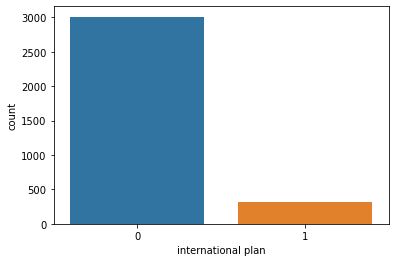

In [ ]:
sns.countplot(data=data,x='international plan')

<AxesSubplot:xlabel='international plan', ylabel='count'>

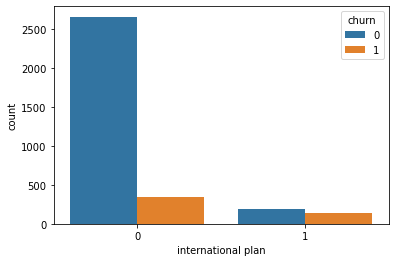

In [ ]:
sns.countplot(data=data,x='international plan', hue='churn')

<AxesSubplot:xlabel='voice mail plan', ylabel='count'>

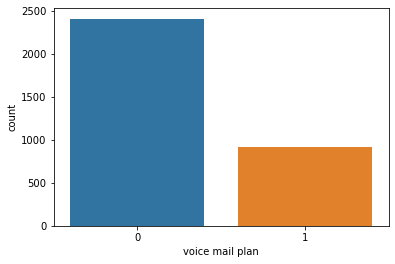

In [ ]:
sns.countplot(data=data,x='voice mail plan')

<AxesSubplot:xlabel='voice mail plan', ylabel='count'>

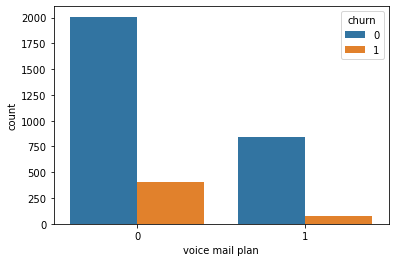

In [ ]:
sns.countplot(data=data,x='voice mail plan', hue='churn')

<AxesSubplot:xlabel='area code', ylabel='count'>

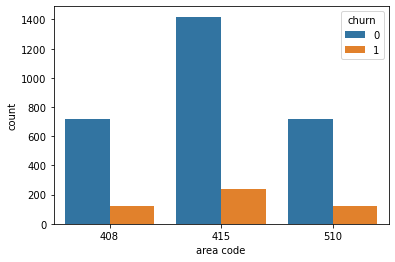

In [ ]:
sns.countplot(data=data,x='area code', hue='churn')

<AxesSubplot:xlabel='customer service calls', ylabel='count'>

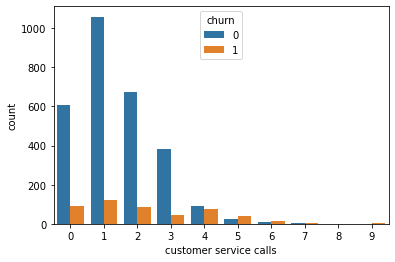

In [ ]:
sns.countplot(data=data,x='customer service calls', hue='churn')

# label encoding state column

In [ ]:
# create label encoder
le = LabelEncoder()

# select column to be encoded
col_to_encode = 'state'

# create a copy of the dataframe
data2 = data.copy()

# fit and transform the column
data2[col_to_encode] = le.fit_transform(data[col_to_encode])

In [ ]:
data2

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,49,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,39,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,6,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


# Correlation analysis

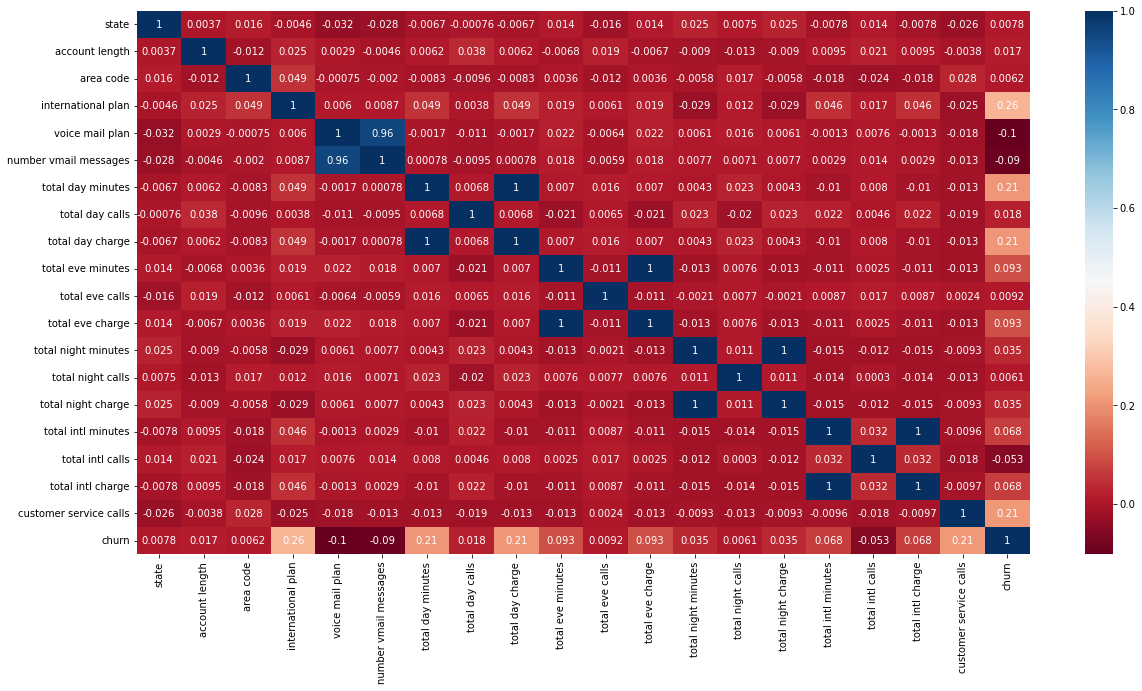

In [ ]:
corr = data2.corr()

plt.figure(figsize=(20,10)) # this sets the size of the figure to width=10 inches, height=8 inches
sns.heatmap(corr, annot=True, cmap='RdBu', annot_kws={"size": 10, "color": "white"})
plt.show()

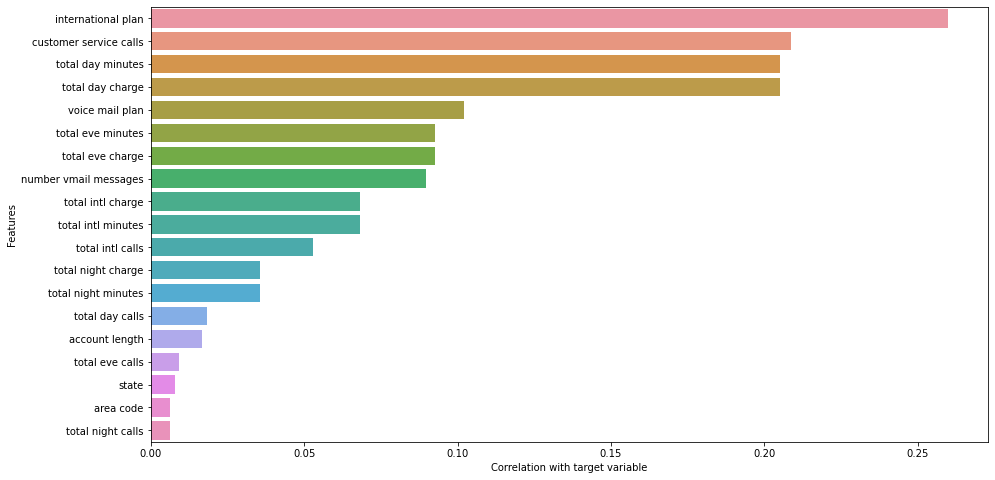

Column names of the 10 best features:
Index(['international plan', 'customer service calls', 'total day minutes',
       'total day charge', 'voice mail plan', 'total eve minutes',
       'total eve charge', 'number vmail messages', 'total intl charge',
       'total intl minutes'],
      dtype='object')


In [ ]:
#separate the target variable
y = data2['churn']
X = data2.drop(columns=['churn'])

#calculate correlation
corr = abs(X.corrwith(y))

# sort correlation values in descending order
corr = corr.sort_values(ascending=False)

# number of top k correlation features
k = 10

# get the top k correlation features
top_k_features = corr.index[:k]
corr_features = top_k_features

plt.figure(figsize=(15,8))
# plot the correlation values in a bar plot
sns.barplot(x=corr.values, y=corr.index)
plt.xlabel('Correlation with target variable')
plt.ylabel('Features')
plt.show()

print("Column names of the {} best features:".format(k))
#print the column names of top k correlation features
print(top_k_features)

# Churn prediction using Classification models

In [ ]:
knn= KNeighborsClassifier(n_neighbors=10,n_jobs=-1)
svm= SVC(random_state=10,kernel='rbf')
lr = LogisticRegression()

rf= RandomForestClassifier(n_jobs=-1,random_state=10)
ada= AdaBoostClassifier(random_state=100)

lgbm = LGBMClassifier(n_jobs=-1,random_state=10)
grad = GradientBoostingClassifier()
xg = XGBClassifier(use_label_encoder =False, eval_metric='logloss')

In [ ]:
scores={'accuracy': make_scorer(accuracy_score),
        'recall' : make_scorer(recall_score),
        'specificity':make_scorer(recall_score,pos_label=0),
        'gmean': make_scorer(geometric_mean_score),
        'roc': make_scorer(roc_auc_score),
        'precision': make_scorer(precision_score),
        'mcc':  make_scorer(matthews_corrcoef)
        }

In [ ]:
x= data2.drop("churn",axis=1)
y= data2["churn"]

In [ ]:
scaler= StandardScaler()
xs= scaler.fit_transform(x)

In [ ]:
#RF
score = cross_validate(rf, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            33.691018
score_time           4.487631
test_accuracy       95.380051
test_recall         72.057823
test_specificity    99.333333
test_gmean          84.508922
test_roc            85.695578
test_precision      94.861788
test_mcc            80.233643
dtype: float64

In [ ]:
# knn
score = cross_validate(knn, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             0.279665
score_time           7.384398
test_accuracy       87.968927
test_recall         20.284864
test_specificity    99.438596
test_gmean          44.649426
test_roc            59.861730
test_precision      86.385920
test_mcc            38.084010
dtype: float64

In [ ]:
# svm
score = cross_validate(svm, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            16.923885
score_time           2.895620
test_accuracy       91.929834
test_recall         50.735544
test_specificity    98.912281
test_gmean          70.683584
test_roc            74.823912
test_precision      88.880668
test_mcc            63.346794
dtype: float64

In [ ]:
# lr
score = cross_validate(lr, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             1.215088
score_time           0.203230
test_accuracy       86.048174
test_recall         21.305272
test_specificity    97.017544
test_gmean          45.204659
test_roc            59.161408
test_precision      55.528492
test_mcc            28.104213
dtype: float64

In [ ]:
# ada
score = cross_validate(ada, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            21.615262
score_time           0.958757
test_accuracy       87.939436
test_recall         38.120748
test_specificity    96.385965
test_gmean          60.415902
test_roc            67.253357
test_precision      64.432526
test_mcc            43.303898
dtype: float64

In [ ]:
# lgbm
score = cross_validate(lgbm, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            15.610714
score_time           0.611775
test_accuracy       95.740051
test_recall         75.786565
test_specificity    99.122807
test_gmean          86.616747
test_roc            87.454686
test_precision      93.678575
test_mcc            81.933808
dtype: float64

In [ ]:
# grad
score = cross_validate(grad, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            80.302246
score_time           0.473332
test_accuracy       94.930140
test_recall         73.516156
test_specificity    98.561404
test_gmean          85.080193
test_roc            86.038780
test_precision      89.774545
test_mcc            78.430101
dtype: float64

In [ ]:
# xgboost
score = cross_validate(xg, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            213.726921
score_time            1.173062
test_accuracy        95.740051
test_recall          77.023810
test_specificity     98.912281
test_gmean           87.205063
test_roc             87.968045
test_precision       92.322972
test_mcc             81.952092
dtype: float64

# xgboost - feature importance

In [ ]:
xtrain,xtest, ytrain, ytest = train_test_split(x,y, random_state=10)

In [ ]:
xtrain

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
2937,17,96,415,0,1,40,108.6,90,18.46,206.4,154,17.54,126.3,118,5.68,13.4,4,3.62,0
248,3,94,408,0,0,0,181.8,85,30.91,202.4,98,17.20,245.9,97,11.07,9.2,2,2.48,4
592,36,92,510,0,0,0,176.3,85,29.97,93.4,125,7.94,207.2,107,9.32,9.6,1,2.59,2
1756,27,118,408,1,1,39,153.8,106,26.15,123.3,111,10.48,117.8,103,5.30,9.2,6,2.48,1
1685,38,69,415,0,0,0,143.6,88,24.41,141.8,86,12.05,194.0,83,8.73,10.8,5,2.92,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,13,77,510,0,1,29,211.1,89,35.89,223.5,97,19.00,148.4,106,6.68,9.7,9,2.62,2
1344,19,111,415,0,0,0,284.4,89,48.35,157.0,113,13.35,242.8,91,10.93,8.4,8,2.27,0
527,31,95,415,0,1,22,40.9,126,6.95,133.4,90,11.34,264.2,91,11.89,11.9,7,3.21,0
3197,41,30,415,0,0,0,247.4,107,42.06,175.9,76,14.95,287.4,90,12.93,11.3,2,3.05,0


In [ ]:
xtest

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
1570,29,112,415,0,0,0,167.6,100,28.49,154.5,90,13.13,281.4,107,12.66,17.3,3,4.67,2
290,6,199,415,0,1,34,230.6,121,39.20,219.4,99,18.65,299.3,94,13.47,8.0,2,2.16,0
1768,23,115,510,1,0,0,122.0,110,20.74,220.2,100,18.72,179.7,124,8.09,10.8,2,2.92,2
101,19,108,415,0,0,0,178.3,137,30.31,189.0,76,16.07,129.1,102,5.81,14.6,5,3.94,0
705,11,99,415,0,0,0,62.9,81,10.69,231.0,64,19.64,168.9,121,7.60,8.5,5,2.30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1757,31,42,408,1,0,0,180.7,127,30.72,174.6,94,14.84,165.3,114,7.44,12.0,6,3.24,2
3210,42,93,510,1,0,0,168.4,114,28.63,276.0,127,23.46,196.2,48,8.83,11.4,3,3.08,1
182,34,67,408,0,1,36,115.6,111,19.65,237.7,94,20.20,169.9,103,7.65,9.9,12,2.67,2
2523,31,88,510,0,0,0,144.3,116,24.53,156.4,74,13.29,214.7,90,9.66,7.8,10,2.11,3


In [ ]:
xg.fit(x,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [ ]:
xg.feature_importances_

array([0.02412402, 0.02206051, 0.02477478, 0.15843178, 0.1690973 ,
       0.03494786, 0.09366399, 0.02389704, 0.        , 0.06292646,
       0.02477517, 0.        , 0.0384211 , 0.02299438, 0.        ,
       0.06534174, 0.09634545, 0.        , 0.13819845], dtype=float32)

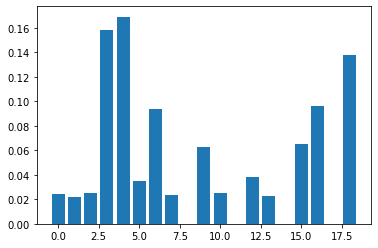

In [ ]:
plt.bar(range(len(xg.feature_importances_)), xg.feature_importances_)
plt.show()

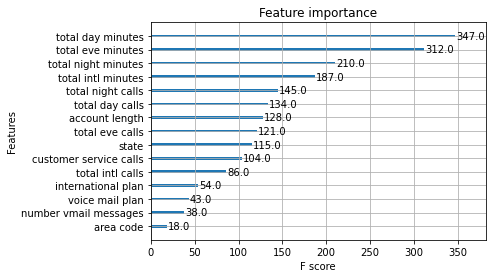

In [ ]:
# plot feature importance
from xgboost import plot_importance
plot_importance(xg)
plt.show()

# SHAP

In [ ]:
import shap
shap_values = shap.TreeExplainer(xg).shap_values(x)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


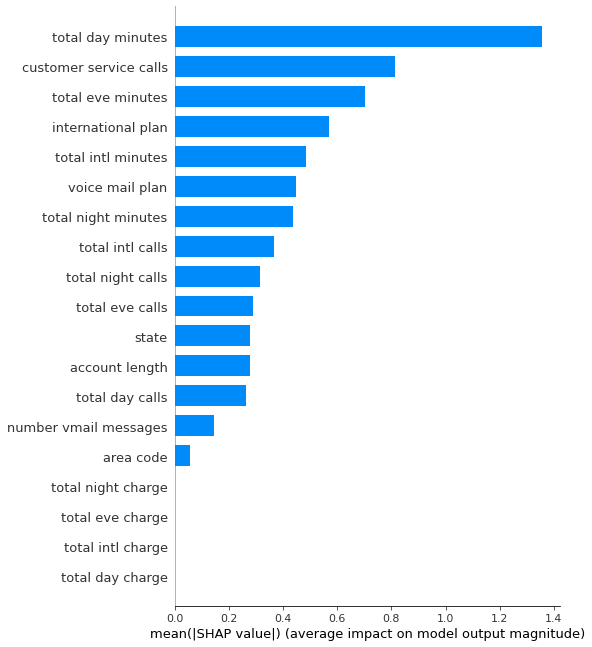

In [ ]:
shap.summary_plot(shap_values, x, plot_type="bar")

# Dealing with class imbalance

In [ ]:
brf= BalancedRandomForestClassifier(n_jobs=-1, random_state=10)
easy=EasyEnsembleClassifier(n_jobs=-1, random_state=10)

In [ ]:

score = cross_validate(brf, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            34.951825
score_time           2.999310
test_accuracy       90.099351
test_recall         85.518707
test_specificity    90.877193
test_gmean          88.110705
test_roc            88.197950
test_precision      61.481894
test_mcc            67.037406
dtype: float64

In [ ]:

score = cross_validate(easy, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            95.599813
score_time          13.188188
test_accuracy       81.669274
test_recall         81.160714
test_specificity    81.754386
test_gmean          81.405658
test_roc            81.457550
test_precision      43.058853
test_mcc            49.721687
dtype: float64